# k-means法（疑似データ）
- 疑似データを用いて、k-means法の学習と予測を実行
- クラスタ数kを変化させて、結果がどのように変わるか確認しよう

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 疑似データの生成
from sklearn.datasets import make_blobs
# k-means法の実装
from sklearn.cluster import KMeans

# Warningを非表示にする
import warnings
warnings.simplefilter('ignore')

## 2. 疑似データの生成
- scikit-learnの[make_blob()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)を用いる

,x1,x2,label
0,0.252924,4.356129,1
1,-1.003102,6.305140,1
2,0.159679,4.006479,1
3,-6.577477,2.077825,0
4,0.012106,6.080160,1


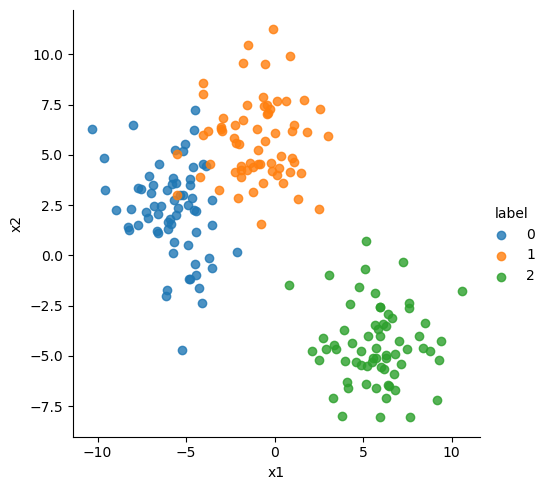

In [2]:
# 特徴Xとラベルyを生成
# サンプル数、クラスタ数、特徴の数、標準偏差、乱数シードを指定
X, y = make_blobs(
    n_samples=200, centers=3, n_features=2,
    cluster_std=2.0, random_state=1234
)

# 特徴Xをデータフレームに変換
df_data = pd.DataFrame(X, columns=["x1","x2"]) 
# ラベルy（クラスタ）をデータフレームに追加
df_data["label"] = y 

# データの確認
display(df_data.head())
# データの散布図を表示
# クラスタで色分け
sns.lmplot(
    x="x1", y="x2", hue="label", 
    data=df_data, fit_reg=False
)
plt.show()

- 一部「外れ値」があり、別クラスタの領域に入り込んでいる

## 3. クラスタリングの実行

### 3-1. グラフ表示用の関数を定義

In [3]:
def plot_clusters(df_data, y_pred, centers):
    # データフレームにラベル（クラスタ）の予測値を追加
    df_data["label_pred"] = y_pred
    
    # データの散布図を表示
    # クラスタごとに色分け
    sns.lmplot(
        x="x1", y="x2", hue="label_pred", 
        data=df_data, fit_reg=False
    )
    # クラスタの中心点を赤色の×で表示
    plt.plot(
        centers[:,0], centers[:,1], 
        marker="x", ls="", color="r"
    )

### 3-2. k=2の場合

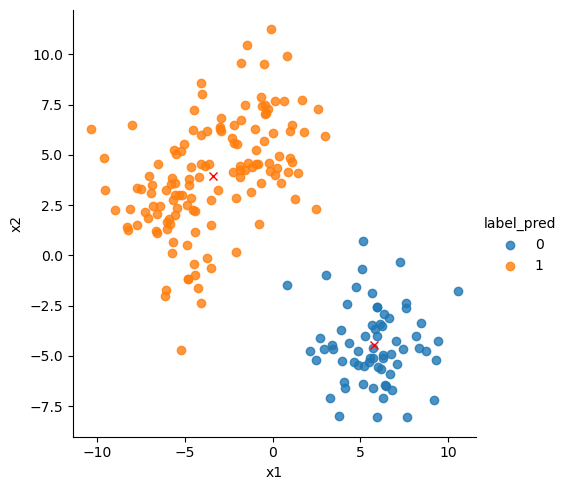

In [4]:
# クラスタ数を2に設定
k = 2
# k-meansのモデルを構築
clf = KMeans(n_clusters=k)
# モデルの学習
clf.fit(X)

# 予測値の計算
y_pred = clf.predict(X)
# 中心点を取得
centers = clf.cluster_centers_

# クラスタリング結果の描画
# 赤色の×は中心点
plot_clusters(df_data, y_pred, centers)

### 3-3. k=3の場合

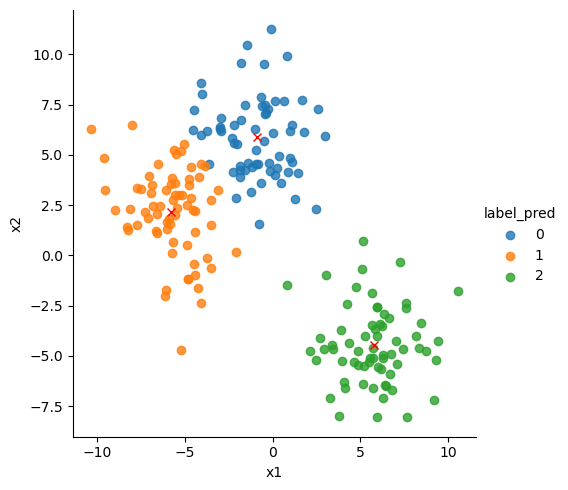

In [5]:
# クラスタ数を3に設定
k = 3
# k-meansのモデルを構築
clf = KMeans(n_clusters=k)
# モデルの学習
clf.fit(X)

# 予測値の計算
y_pred = clf.predict(X)
# 中心点を取得
centers = clf.cluster_centers_

# クラスタリング結果の描画
# 赤色の×は中心点
plot_clusters(df_data, y_pred, centers)

### 3-4. k=4の場合

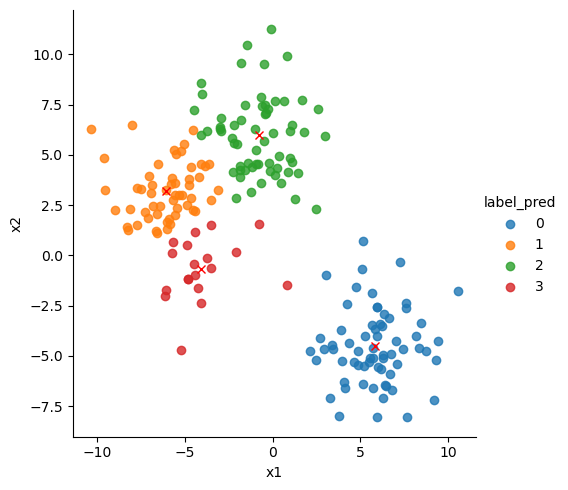

In [6]:
# クラスタ数を4に設定
k = 4
# k-meansのモデルを構築
clf = KMeans(n_clusters=k)
# モデルの学習
clf.fit(X)

# 予測値の計算
y_pred = clf.predict(X)
# 中心点を取得
centers = clf.cluster_centers_

# クラスタリング結果の描画
# 赤色の×は中心点
plot_clusters(df_data, y_pred, centers)

## 4. エルボー法の実行

エルボー法を用いて、最適なクラスタ数を探索

* クラスタ数kと誤差の合計値を用いてグラフを作成
    * kが増えるほど誤差の合計値は減少する
    + 急激に値の減少が緩やかになるポイントが重要
* `inertia_`を呼び出して、**クラスタ内誤差平方和（SSE）**を取得
    * データ点とそれが属するクラスタ重心との、ユークリッド距離の二乗の合計
    
$\mathrm{SSE}=\displaystyle \sum^n_{i=1}\displaystyle \sum^k_{j=1}w^{(i,j)}||x^{(i)}-\mu^{(j)}||^2_2$  

- $n:$データ数  
- $k:$クラスタ数  
- $w:$サンプル点$x^{(i)}$がクラスタ$j$内に存在する場合は$w^{(i,j)}=1$、存在しない場合は、$w^{(i,j)}=0$  


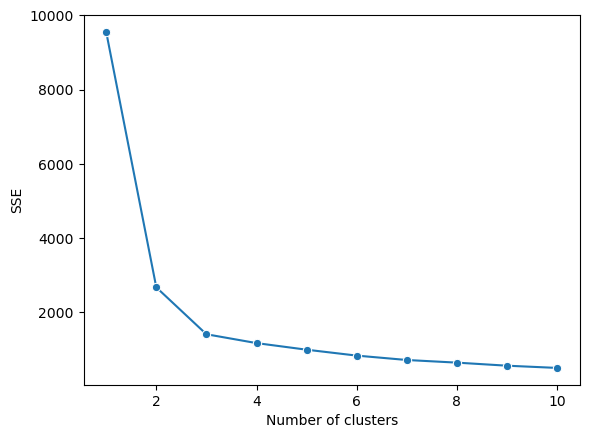

In [7]:
# エルボー法を行い、その結果をグラフ化
def plot_elbow(X, k_start, k_end):
    # SSEを格納するための配列
    sse = []
    # クラスタ数をk_startからk_endまで増やす
    for i in range(k_start, k_end+1):
        # モデルの構築
        clf = KMeans(n_clusters=i,random_state=1234)
        # モデルの学習
        clf.fit(X)
        # SSEの値を取得して配列に追加
        sse.append(clf.inertia_)

    # クラスタ数とSSEをまとめたデータフレームを作成
    df = pd.DataFrame({
        'Number of clusters': range(k_start, k_end+1), 
        'SSE': sse
    })
    # グラフの表示
    sns.lineplot(x='Number of clusters', y='SSE', data=df, marker="o")
    plt.show()
    
# 関数の実行
plot_elbow(X, k_start=1, k_end=10)

* この例では、きれいに「肘」が表れている